# Image deconvolution

In [ ]:
# Import some libraries

import numpy as np
from skimage import color, data, restoration
import matplotlib.pyplot as plt
import scipy
from scipy.signal import fftconvolve, convolve
from scipy.signal import convolve2d
from skimage import io
import skimage
from scipy import fftpack
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Define function to show images

def show_images(im1, im1_title, im2, im2_title, im3, im3_title, font):
    fig, (image1, image2, image3) = plt.subplots(1, 3, figsize=(15, 50))
    image1.imshow(im1, cmap='gray')
    image1.set_title(im1_title, fontsize=font)
    image1.set_axis_off()
    image2.imshow(im2, cmap='gray')
    image2.set_title(im2_title, fontsize=font)
    image2.set_axis_off()
    image3.imshow(im3, cmap='gray')
    image3.set_title(im3_title, fontsize=font)
    image3.set_axis_off()
    fig.subplots_adjust(wspace=0.02, hspace=0.2,
                        top=0.9, bottom=0.05, left=0, right=1)
    fig.show()

Image formation process can be described by the convolution model

$\mathbf{y} = \mathbf{k} \ast \mathbf{x} + \mathbf{n}$,

where $\mathbf{y}$ is the resulting blurred and noisy image, $\mathbf{k}$ is the blurring kernel, or point spread function of a system (PSF), $\mathbf{x}$ is the underlying image that we aim to restore and $\mathbf{n}$ ~ $\mathcal{N}(0, \sigma^{2})$ denotes noise, which is assumed to follow i.i.d Gaussian distribution.

The goal of this homework is to show how one can restore an image distorted with blur and noise with some widely used deconvolution algorithm(s) and see how regularization improves the result.


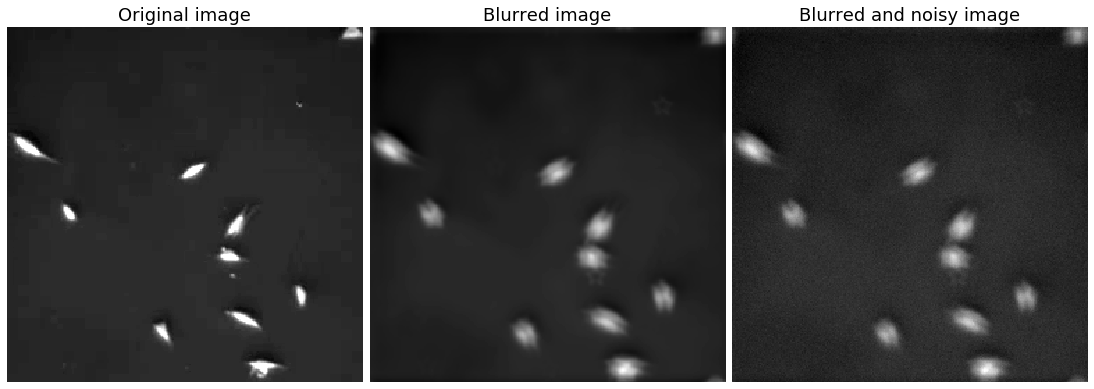

In [ ]:
# Load the blurred and noisy image and the kernel

data = np.load('./2021_data.npz')
gt = data['arr_0']
blurred = data['arr_1']
distorted = data['arr_2']
psf = data['arr_3']

show_images(gt, 'Original image', blurred, 'Blurred image',\
           distorted, 'Blurred and noisy image', font=18)

**a)** Try to understand what is the shape of the blurring kernel in this task by looking at the distorted images. Did your conclusions match the actual shape of the psf = data['arr_3']? *(1 point)*

**YOUR ANSWER:**

The common practice in optics is to normalize blurring kernel such that

$\sum_{i,j}k_{i,j} = 1$.

This is done to keep the same range of values.

Please, write a code for this operation below.

In [ ]:
# SOLUTION

# YOUR CODE HERE #

In [ ]:
plt.imshow(psf, cmap='gray')
print('Sum of PSF elements:', psf.sum())

In this homework we will consider two deconvolution approaches:
1. Wiener filter
2. Wiener filter with regularization

## Wiener filter

**b)** One of the most popular an widely-used deconvolution algorithms is Wiener filter. Wiener filter retrieves the maximum likelihood estimation uder the assumption of Gaussian noise

$\hat{\mathbf{x}} = \arg\!\min_{\mathbf{x}}\frac{1}{2}||\mathbf{y}-\mathbf{Kx}||^{2}_{2}$.

Solving this equation, one yields the solution in the form

$\hat{\mathbf{x}} = (\mathbf{K}^{\top}\mathbf{H})^{-1}\mathbf{K}^{\top}\mathbf{y}$.

Under assumption of periodic boundary conditions matrix $\textbf{K}$ is a circulant matrix, so the solution can be formulated in the frequency domain as (with the frequency domain coordinates $\textit{u}$ and $\textit{v}$)

$\hat{X}(u,v) = \frac{K^{*}(u,v)}{|K(u,v)|^{2}}Y(u,v)$. The term $\frac{K^{*}(u,v)}{|K(u,v)|^{2}}$ is called Wiener filter.

Do not forget that $\hat{x}(i,j) = F^{-1}\hat{X}(u,v)$.

*3 points*

In [ ]:
# SOLUTION

# Do all necessary modifications with the PSF before
# applying Fourier transform:

"""
YOUR CODE HERE
"""

# Perform Fourier transform
K = # YOUR CODE HERE #
Y = # YOUR CODE HERE #

wiener_filter = # YOUR CODE HERE #

x_hat_wf = # YOUR CODE HERE #

In [ ]:
show_images(gt, 'Original image', distorted, 'Blurred image',\
           x_hat_wf, 'Restored with wiener filter', font=18)

From the results and from the formulation of the solution you can see that the Wiener filter without regularization approximates the inverse filter, that we saw in the seminar. The image is dominated by the amplified noise. One commonly used solution to avoid this issue is to add regularization into the optimization scheme by applying constraint on the solution.

## Regularized Wiener filter

With inclusion of a regularization the solution yields the form of

$\hat{\mathbf{x}} = \arg\!\min_{\mathbf{x}}\frac{1}{2}||\mathbf{y}-\mathbf{Kx}||^{2}_{2}+\alpha||\mathbf{Lx}||^2_{2}$.

Here regularization term is represented by the Laplacian filter acting and l2-norm. 

Solution of this equation yields the form of

$\hat{\mathbf{x}} = (\mathbf{K}^{\top}\mathbf{K}+\alpha\mathbf{L}^{\top}\mathbf{L})^{-1}\mathbf{K}^{\top}\mathbf{y}$.

Again, reformulation of the solution in the frequence domain results in

$X(u,v) = \frac{K^{*}(u,v)}{|K(u,v)|^{2} + \alpha|L(u,v)|^{2}}Y(u,v)$.

*3 points*

In [ ]:
# SOLUTION

laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

alpha = 0.3 #you can select another value, but remember that alpha >= 0
reg_param = alpha

#Perform all necessary preparations with the PSF
"""
YOUR CODE HERE
"""
#Perform all necessary preparations with the regularization filter
"""
YOUR CODE HERE
"""

K = # YOUR CODE HERE #
L = # YOUR CODE HERE #
Y = # YOUR CODE HERE #

wiener_filter = # YOUR CODE HERE #

x_hat_wf_reg = # YOUR CODE HERE #

In [ ]:
show_images(gt, 'Original image', distorted, 'Blurred image',\
           x_hat_wf_reg, 'Restored with wiener filter + \nregularization', font=18)

## Explore existing python libraries

**c)** Now as you have a practical understanding about how some deconvolution algorithms work, the goal of the next task is to find some plug-and-play implementations of deconvolution algorithms, developed in Python.

Let's search for existing python libraries that include deconvolution algorithms and compare them with what you have written by yourself.

Feel free to explore any python library, but try to understand the basis of one or another algorithm that you want to use.

You can start with exploring *scikit-image* or *scipy* libraries.

*2 points*

In [ ]:
"""
YOUR CODE HERE
"""

## Assessment of the results

**d)** Usually the quality of image restoration is evaluated with the metrics -- mean-squared error (MSE), peak signal to noise ratio (PSNR) and structural similarity (SSIM).
In this task you goal is to calculate these metrics for all restored images and plot the values using, for example, bar plot. 

*2 points*

In [ ]:
# Write here your own calculation of MSE, PSNR and SSIM. 
# Or import them from the existing python libraries -- whatever suits you better.

"""
YOUR CODE HERE
"""

In [ ]:
# Calculate metrics and plot the values.
# Which deconvolution algorithm recovers the image better?

"""
YOUR CODE HERE
"""

### Additional questions:

* For the regularization task we used the Laplacian kernel. What other kernels can be used? Try some of them and compare the results.

* You can also play with the different value of the regularization parameter and see how does it affect the result.